# Simple Dataset

## Prepare Data

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
file_path = '/content/output_simp_500.csv'
df = pd.read_csv(file_path)

# Ensure all feature columns are numeric
feature_columns = [
    'overall_Violence', 'overall_Sexual Content', 'overall_General',
    'overall_Drug/Alcohol', 'overall_Profanity'
]

# Convert feature columns to numeric (if needed)
df[feature_columns] = df[feature_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows where all feature columns are zero
df = df[(df[feature_columns] != 0).all(axis=1)]

# Drop irrelevant columns
irrelevant_columns = ['movie_name', 'mpaa_category']  # Exclude movie_name and mpaa
df = df.drop(columns=irrelevant_columns)

# Use `mpaa_category` as the target variable
X = df[feature_columns]  # Features
y = df['mpaa']  # Target (categories like 'Family-Friendly', 'Adult')

# Prepare Train Test Split
np.random.seed(42)

# Data with Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Display the shapes of the cleaned dataset
print("Preprocessed Dataset:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")

# Display the distribution of the target variable
print("\nTarget Variable Distribution (Train):")
print(y_train.value_counts())

print("\nTarget Variable Distribution (Test):")
print(y_test.value_counts())


Preprocessed Dataset:
Features (X): (490, 5)
Target (y): (490,)

Target Variable Distribution (Train):
mpaa
R        181
PG-13     86
PG        48
NR        18
G          8
NC-17      2
Name: count, dtype: int64

Target Variable Distribution (Test):
mpaa
R        78
PG-13    37
PG       20
NR        7
G         4
NC-17     1
Name: count, dtype: int64


## Decision Tree

### Baseline Model


Baseline Decision Tree Results (Test Set):
Accuracy: 0.449, Precision: 0.471, Recall: 0.449



<Figure size 800x600 with 0 Axes>

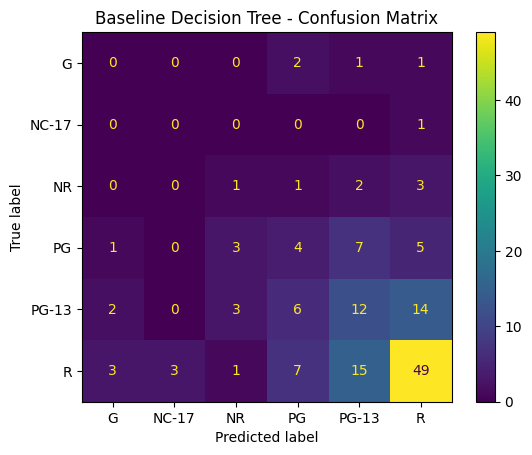

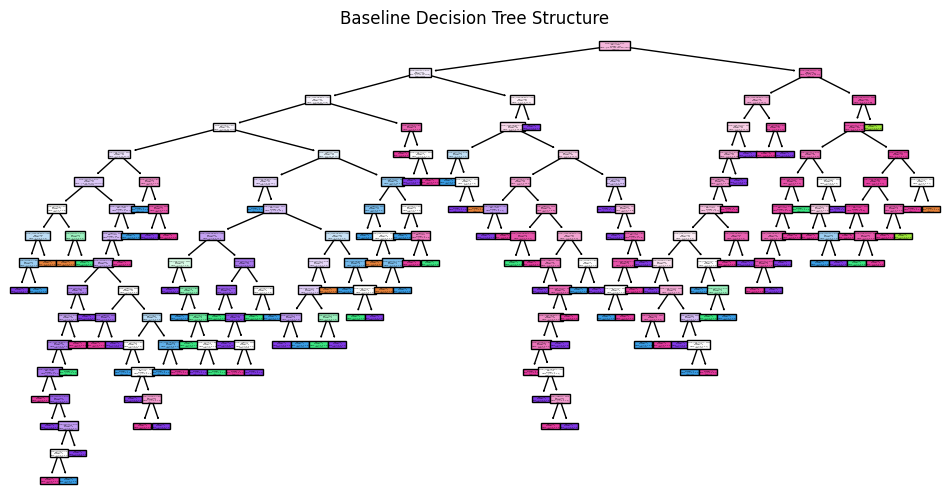

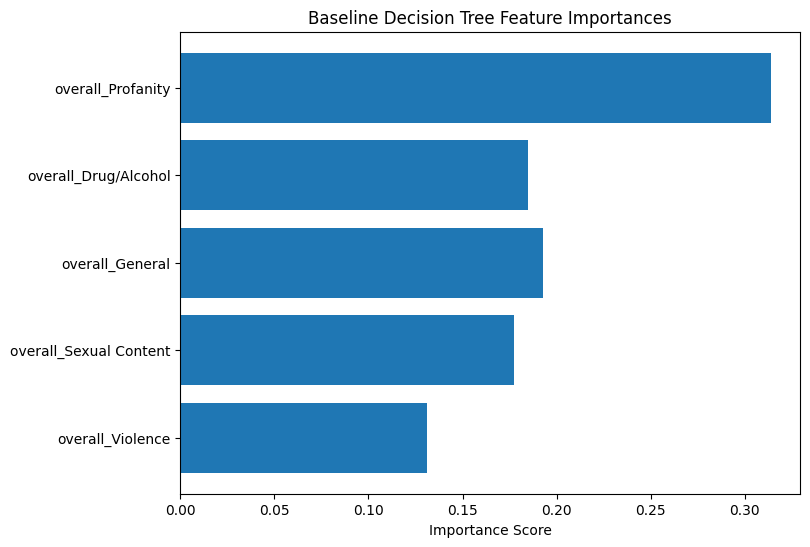




Comparison Table:
           Baseline Decision Tree
Accuracy                    0.449
Precision                   0.471
Recall                      0.449


In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize comparison DataFrame (if it doesn't already exist)
if 'comparison' not in globals():
    comparison = pd.DataFrame(index=["Accuracy", "Precision", "Recall"])

# Train-Test Split is already done (X_train, X_test, y_train, y_test)
# Baseline Decision Tree Model (No Class Weights)
baseline_tree_model = DecisionTreeClassifier(random_state=42)
baseline_tree_model.fit(X_train, y_train)  # Train the model on the training set

# Predictions on the test set
baseline_tree_pred = baseline_tree_model.predict(X_test)
baseline_tree_prob = baseline_tree_model.predict_proba(X_test)  # Optional: Probabilities

# Evaluate Baseline Decision Tree
baseline_tree_acc = accuracy_score(y_test, baseline_tree_pred)
baseline_tree_precision = precision_score(y_test, baseline_tree_pred, average='weighted')
baseline_tree_recall = recall_score(y_test, baseline_tree_pred, average='weighted')

print("\nBaseline Decision Tree Results (Test Set):")
print(f"Accuracy: {baseline_tree_acc:.3f}, Precision: {baseline_tree_precision:.3f}, Recall: {baseline_tree_recall:.3f}\n")

# Add Baseline Decision Tree results to Comparison DataFrame
comparison["Baseline Decision Tree"] = [baseline_tree_acc, baseline_tree_precision, baseline_tree_recall]

# Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, baseline_tree_pred,  # Use the test set predictions
    display_labels=np.unique(y_test)  # Correctly display unique categories from the test set
)
plt.title("Baseline Decision Tree - Confusion Matrix")
plt.show()

print("\n")

# 2. Decision Tree Visualization
plt.figure(figsize=(12, 6))
plot_tree(
    baseline_tree_model, filled=True, feature_names=X.columns,
    class_names=[str(label) for label in np.unique(y_train)]  # Display unique categories from the training set
)
plt.title("Baseline Decision Tree Structure")
plt.show()

print("\n")

# 3. Feature Importance Plot
plt.figure(figsize=(8, 6))
plt.barh(X.columns, baseline_tree_model.feature_importances_)
plt.title("Baseline Decision Tree Feature Importances")
plt.xlabel("Importance Score")
plt.show()

print("\n")

# Display comparison table
print("\nComparison Table:")
print(comparison.round(3))


### Tuned Model

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Tuned Decision Tree Results (Test Set):
Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Accuracy: 0.544, Precision: 0.451, Recall: 0.544



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x600 with 0 Axes>

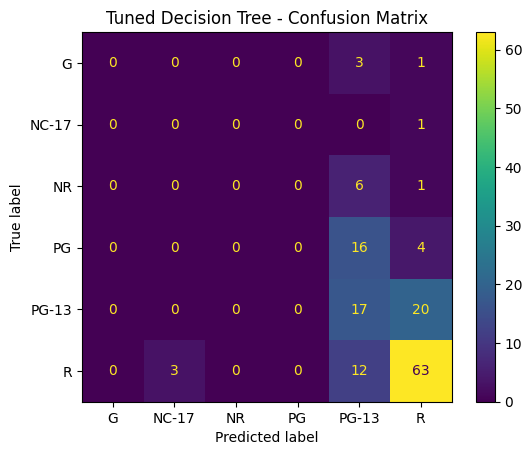

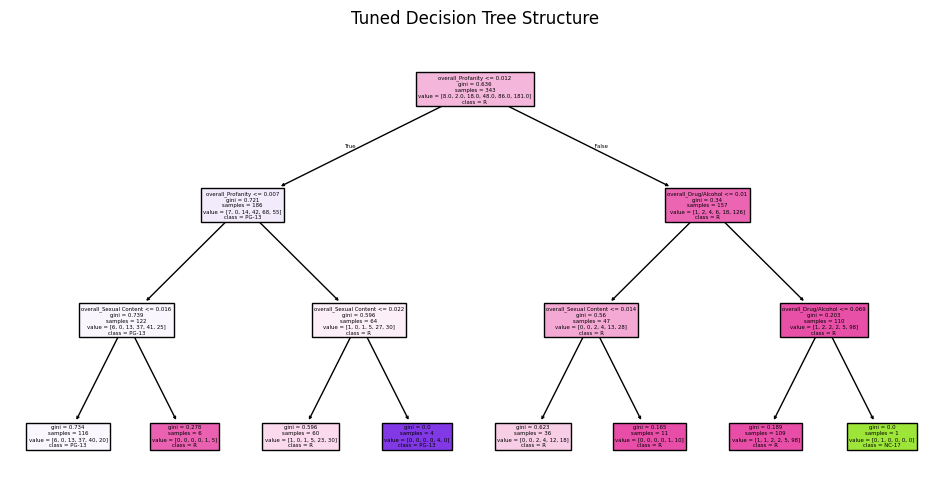

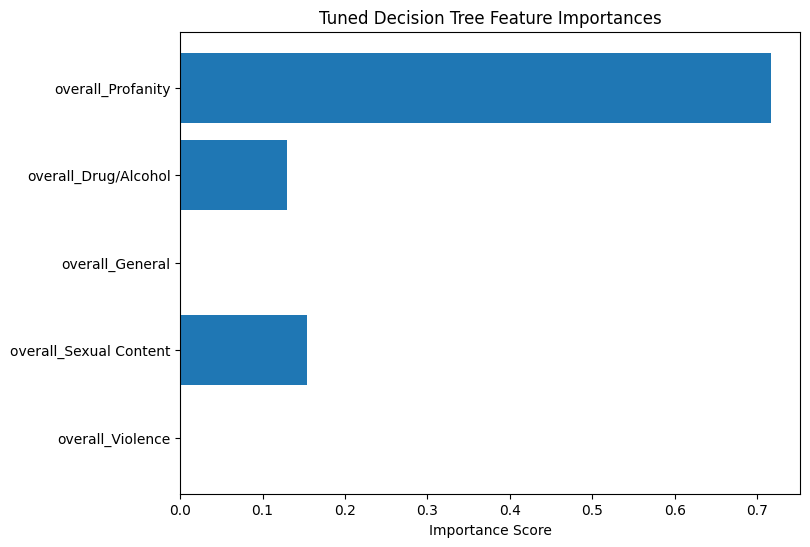




Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree
Accuracy                    0.449                0.544
Precision                   0.471                0.451
Recall                      0.449                0.544


In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hyperparameter Tuning for Decision Tree
tree_params = {
    'max_depth': range(1, 11),  # Test different tree depths
    'min_samples_split': [2, 5, 10]  # Test different minimum samples for splits
}

# GridSearchCV without class weights
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)

# Best Decision Tree Model
best_tree_model = tree_grid.best_estimator_

# Predictions on the test set
y_tree_pred = best_tree_model.predict(X_test)

# Evaluate Tuned Decision Tree Model
tree_acc = accuracy_score(y_test, y_tree_pred)
tree_precision = precision_score(y_test, y_tree_pred, average='weighted')
tree_recall = recall_score(y_test, y_tree_pred, average='weighted')

print("\nTuned Decision Tree Results (Test Set):")
print(f"Best Parameters: {tree_grid.best_params_}")
print(f"Accuracy: {tree_acc:.3f}, Precision: {tree_precision:.3f}, Recall: {tree_recall:.3f}\n")

# Add Tuned Decision Tree results to Comparison DataFrame
comparison["Tuned Decision Tree"] = [tree_acc, tree_precision, tree_recall]

# Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_tree_pred,
    display_labels=np.unique(y_test)  # Correctly align unique categories from the test set
)
plt.title("Tuned Decision Tree - Confusion Matrix")
plt.show()

print("\n")

# 2. Decision Tree Visualization
plt.figure(figsize=(12, 6))
plot_tree(
    best_tree_model, filled=True, feature_names=X.columns,
    class_names=[str(label) for label in np.unique(y_train)]  # Align unique class names with training set
)
plt.title("Tuned Decision Tree Structure")
plt.show()

print("\n")

# 3. Feature Importance Plot
plt.figure(figsize=(8, 6))
plt.barh(X.columns, best_tree_model.feature_importances_)
plt.title("Tuned Decision Tree Feature Importances")
plt.xlabel("Importance Score")
plt.show()

print("\n")

# Display comparison table
print("\nComparison Table:")
print(comparison.round(3))


## Random Forest

### Baseline Model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Baseline Random Forest Results (Test Set):
Accuracy: 0.605, Precision: 0.546, Recall: 0.605



<Figure size 800x600 with 0 Axes>

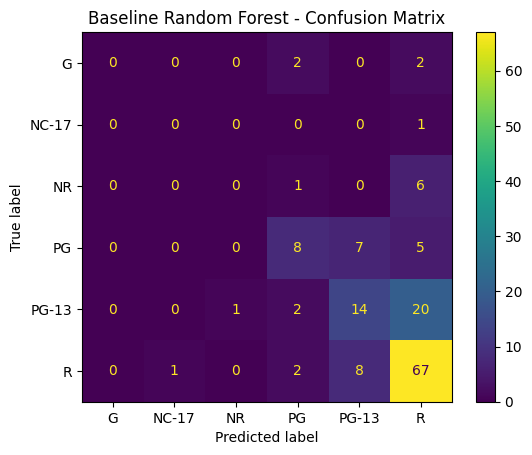

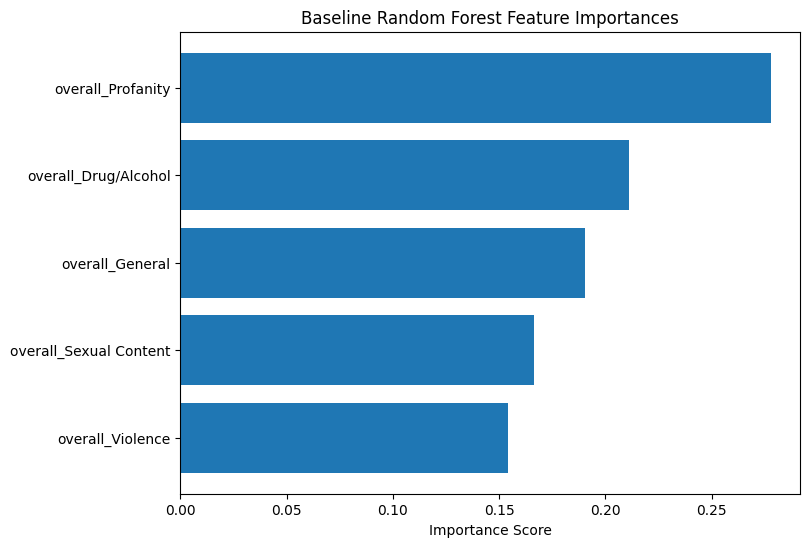


Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree  Baseline Random Forest
Accuracy                    0.449                0.544                   0.605
Precision                   0.471                0.451                   0.546
Recall                      0.449                0.544                   0.605


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize comparison DataFrame (if it doesn't already exist)
if 'comparison' not in globals():
    comparison = pd.DataFrame(index=["Accuracy", "Precision", "Recall"])

# Baseline Random Forest Classifier
baseline_rf_model = RandomForestClassifier(random_state=42)  # Add random_state for reproducibility
baseline_rf_model.fit(X_train, y_train)  # Fit the model using the training set

# Predictions on the test set
baseline_rf_pred = baseline_rf_model.predict(X_test)

# Evaluate Baseline Random Forest
baseline_rf_acc = accuracy_score(y_test, baseline_rf_pred)
baseline_rf_precision = precision_score(y_test, baseline_rf_pred, average='weighted')
baseline_rf_recall = recall_score(y_test, baseline_rf_pred, average='weighted')

print("\nBaseline Random Forest Results (Test Set):")
print(f"Accuracy: {baseline_rf_acc:.3f}, Precision: {baseline_rf_precision:.3f}, Recall: {baseline_rf_recall:.3f}\n")

# Add Baseline Random Forest results to Comparison DataFrame
comparison["Baseline Random Forest"] = [baseline_rf_acc, baseline_rf_precision, baseline_rf_recall]

# Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, baseline_rf_pred,
    display_labels=np.unique(y_test)  # Correctly align unique categories from the test set
)
plt.title("Baseline Random Forest - Confusion Matrix")
plt.show()

print("\n")

# 2. Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, baseline_rf_model.feature_importances_)
plt.title("Baseline Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.show()

# Display comparison table
print("\nComparison Table:")
print(comparison.round(3))


### Tuned Model

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Tuned Random Forest Results (Test Set):
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.626, Precision: 0.563, Recall: 0.626



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x600 with 0 Axes>

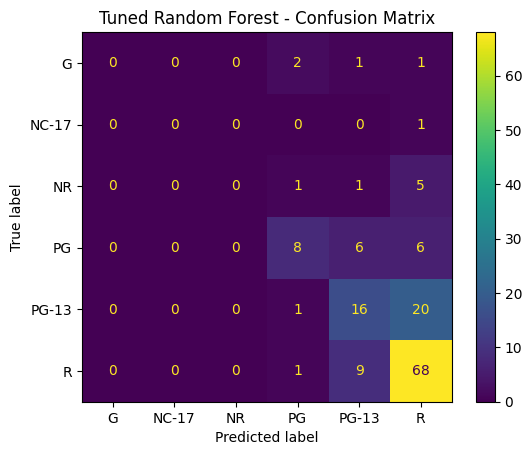

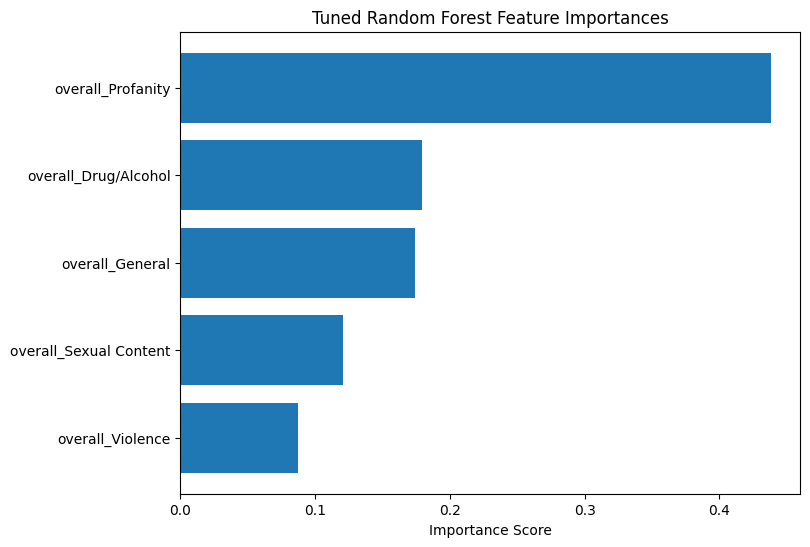




Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree  \
Accuracy                    0.449                0.544   
Precision                   0.471                0.451   
Recall                      0.449                0.544   

           Baseline Random Forest  Tuned Random Forest  
Accuracy                    0.605                0.626  
Precision                   0.546                0.563  
Recall                      0.605                0.626  


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize comparison DataFrame (if it doesn't already exist)
if 'comparison' not in globals():
    comparison = pd.DataFrame(index=["Accuracy", "Precision", "Recall"])

# Extended Hyperparameter Tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200, 300],  # More options for the number of trees
    'max_depth': [None, 10, 20, 30, 40],  # Deeper trees for complex data
    'min_samples_split': [2, 5, 10, 20],  # Test stricter splits
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None]  # Try different strategies for feature selection
}

# GridSearchCV for Hyperparameter Tuning
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),  # No class weights
    rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1  # Use all CPUs for faster tuning
)
rf_grid.fit(X_train, y_train)

# Best Random Forest Model
best_rf_model = rf_grid.best_estimator_

# Predictions on the test set
y_rf_pred = best_rf_model.predict(X_test)

# Evaluate Tuned Random Forest Model
rf_acc = accuracy_score(y_test, y_rf_pred)
rf_precision = precision_score(y_test, y_rf_pred, average='weighted')
rf_recall = recall_score(y_test, y_rf_pred, average='weighted')

print("\nTuned Random Forest Results (Test Set):")
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Accuracy: {rf_acc:.3f}, Precision: {rf_precision:.3f}, Recall: {rf_recall:.3f}\n")

# Add Tuned Random Forest results to Comparison DataFrame
comparison["Tuned Random Forest"] = [rf_acc, rf_precision, rf_recall]

# Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_rf_pred,
    display_labels=np.unique(y_test)  # Correctly align unique categories from the test set
)
plt.title("Tuned Random Forest - Confusion Matrix")
plt.show()

print('\n')

# 2. Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, best_rf_model.feature_importances_)
plt.title("Tuned Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.show()

print('\n')

# Display comparison table
print("\nComparison Table:")
print(comparison.round(3))


## Gradient Boosting

### Baseline Model


Baseline Gradient Boosting Results (Test Set):
Accuracy: 0.544, Precision: 0.547, Recall: 0.544



<Figure size 800x600 with 0 Axes>

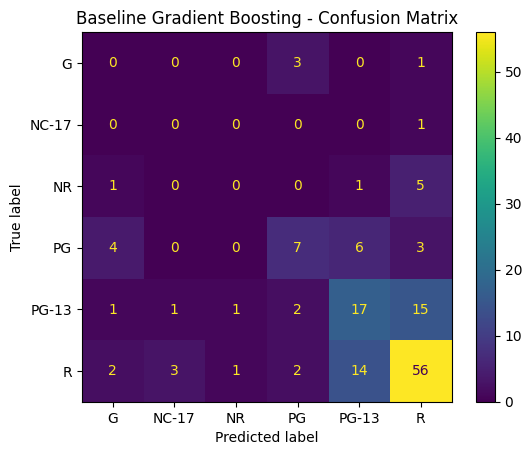

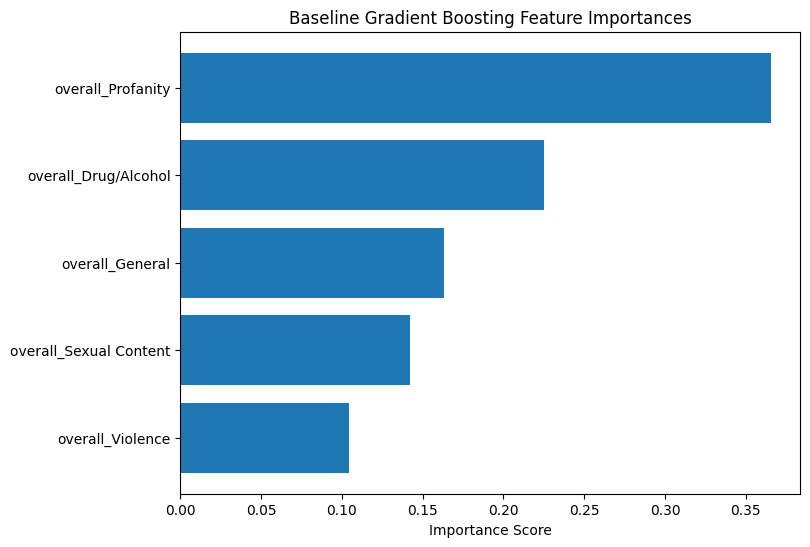




Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree  \
Accuracy                    0.449                0.544   
Precision                   0.471                0.451   
Recall                      0.449                0.544   

           Baseline Random Forest  Tuned Random Forest  \
Accuracy                    0.605                0.626   
Precision                   0.546                0.563   
Recall                      0.605                0.626   

           Baseline Gradient Boosting  
Accuracy                        0.544  
Precision                       0.547  
Recall                          0.544  


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize comparison DataFrame (if it doesn't already exist)
if 'comparison' not in globals():
    comparison = pd.DataFrame(index=["Accuracy", "Precision", "Recall"])

# Baseline Gradient Boosting Model
baseline_gb_model = GradientBoostingClassifier(random_state=42)
baseline_gb_model.fit(X_train, y_train)  # Fit the model using the training set

# Predictions on the test set
y_gb_pred = baseline_gb_model.predict(X_test)

# Evaluate Baseline Gradient Boosting Model
gb_acc = accuracy_score(y_test, y_gb_pred)
gb_precision = precision_score(y_test, y_gb_pred, average='weighted')
gb_recall = recall_score(y_test, y_gb_pred, average='weighted')

print("\nBaseline Gradient Boosting Results (Test Set):")
print(f"Accuracy: {gb_acc:.3f}, Precision: {gb_precision:.3f}, Recall: {gb_recall:.3f}\n")

# Add Baseline Gradient Boosting results to Comparison DataFrame
comparison["Baseline Gradient Boosting"] = [gb_acc, gb_precision, gb_recall]

# Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_gb_pred,
    display_labels=np.unique(y_test)  # Correctly align unique categories from the test set
)
plt.title("Baseline Gradient Boosting - Confusion Matrix")
plt.show()

print("\n")

# 2. Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, baseline_gb_model.feature_importances_)
plt.title("Baseline Gradient Boosting Feature Importances")
plt.xlabel("Importance Score")
plt.show()

print("\n")

# Display comparison table
print("\nComparison Table:")
print(comparison.round(3))


### Tuned Model

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Tuned Gradient Boosting Results (Test Set):
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.633, Precision: 0.621, Recall: 0.633



<Figure size 800x600 with 0 Axes>

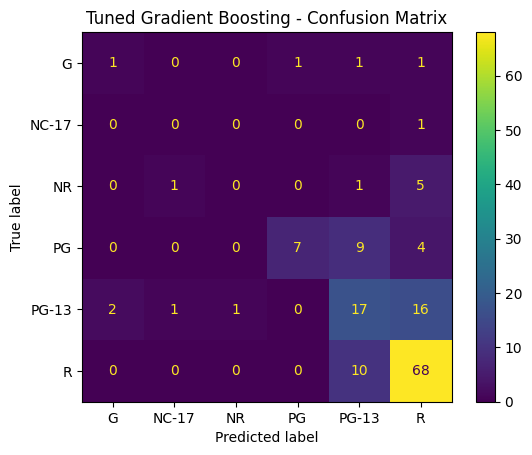

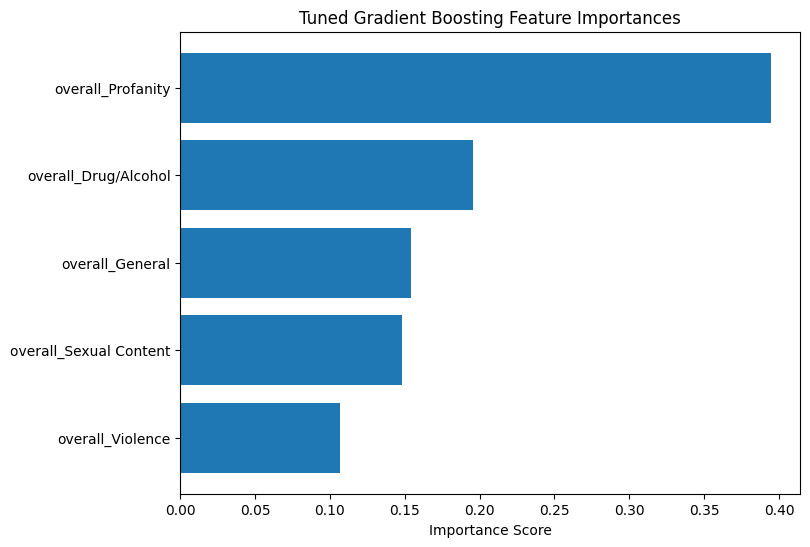




Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree  \
Accuracy                    0.449                0.544   
Precision                   0.471                0.451   
Recall                      0.449                0.544   

           Baseline Random Forest  Tuned Random Forest  \
Accuracy                    0.605                0.626   
Precision                   0.546                0.563   
Recall                      0.605                0.626   

           Baseline Gradient Boosting  Tuned Gradient Boosting  
Accuracy                        0.544                    0.633  
Precision                       0.547                    0.621  
Recall                          0.544                    0.633  


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize comparison DataFrame (if it doesn't already exist)
if 'comparison' not in globals():
    comparison = pd.DataFrame(index=["Accuracy", "Precision", "Recall"])

# Hyperparameter Tuning for Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks the contribution of each tree
    'max_depth': [3, 5, 7, 9],  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5],  # Minimum samples required in a leaf node
    'subsample': [0.8, 1.0]  # Fraction of samples used for fitting each tree
}

# GridSearchCV for Hyperparameter Tuning
gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1  # Use all CPUs for faster tuning
)
gb_grid.fit(X_train, y_train)

# Best Gradient Boosting Model
best_gb_model = gb_grid.best_estimator_

# Predictions on the test set
y_gb_pred = best_gb_model.predict(X_test)

# Evaluate Tuned Gradient Boosting Model
gb_acc = accuracy_score(y_test, y_gb_pred)
gb_precision = precision_score(y_test, y_gb_pred, average='weighted')
gb_recall = recall_score(y_test, y_gb_pred, average='weighted')

print("\nTuned Gradient Boosting Results (Test Set):")
print(f"Best Parameters: {gb_grid.best_params_}")
print(f"Accuracy: {gb_acc:.3f}, Precision: {gb_precision:.3f}, Recall: {gb_recall:.3f}\n")

# Add Tuned Gradient Boosting results to Comparison DataFrame
comparison["Tuned Gradient Boosting"] = [gb_acc, gb_precision, gb_recall]

# Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_gb_pred,
    display_labels=np.unique(y_test)  # Correctly align unique categories from the test set
)
plt.title("Tuned Gradient Boosting - Confusion Matrix")
plt.show()

print("\n")

# 2. Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, best_gb_model.feature_importances_)
plt.title("Tuned Gradient Boosting Feature Importances")
plt.xlabel("Importance Score")
plt.show()

print("\n")

# Display comparison table
print("\nComparison Table:")
print(comparison.round(3))


## DNN

### Baseline Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2615 - loss: 1.7478 - val_accuracy: 0.5510 - val_loss: 1.4778
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5460 - loss: 1.4516 - val_accuracy: 0.5238 - val_loss: 1.3074
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5722 - loss: 1.2828 - val_accuracy: 0.5510 - val_loss: 1.2319
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5014 - loss: 1.3503 - val_accuracy: 0.5510 - val_loss: 1.1884
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5483 - loss: 1.2497 - val_accuracy: 0.5306 - val_loss: 1.1599
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5672 - loss: 1.1942 - val_accuracy: 0.5238 - val_loss: 1.1384
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5633 - loss: 1.1959 - val_accuracy: 0.5238 - val_loss: 1.1194
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5465 - loss: 1.1003 - val_accuracy: 0.5170 - val_loss

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

<Figure size 800x600 with 0 Axes>

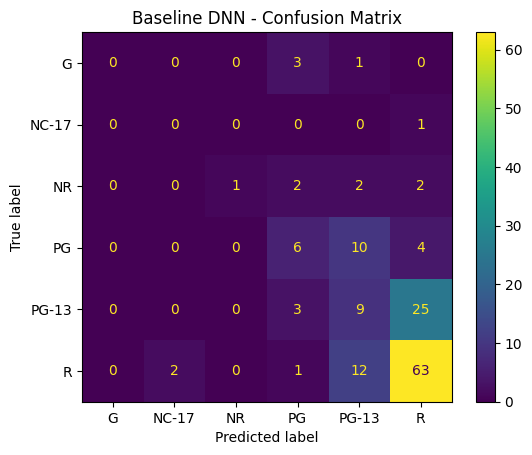

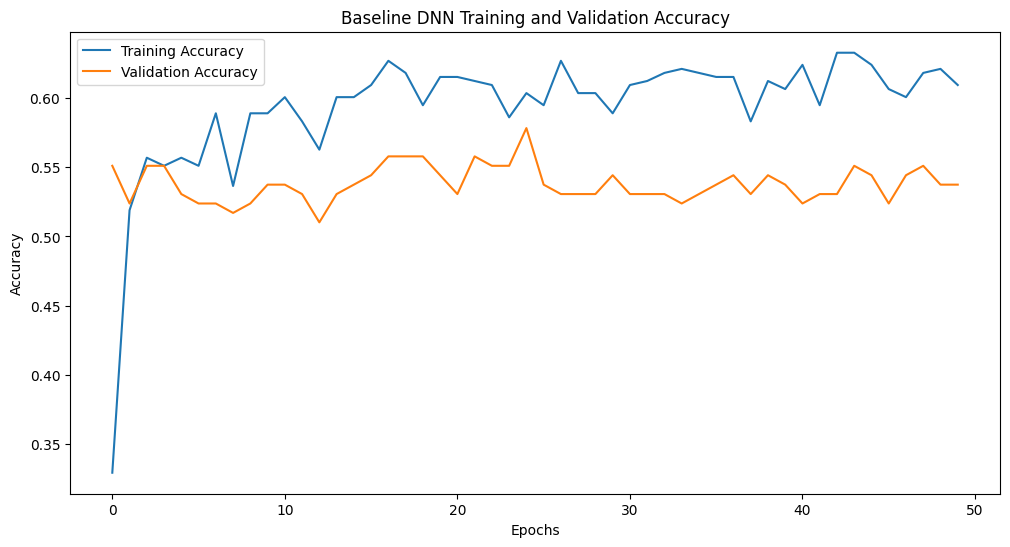




Updated Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree  \
Accuracy                    0.449                0.544   
Precision                   0.471                0.451   
Recall                      0.449                0.544   

           Baseline Random Forest  Tuned Random Forest  \
Accuracy                    0.605                0.626   
Precision                   0.546                0.563   
Recall                      0.605                0.626   

           Baseline Gradient Boosting  Tuned Gradient Boosting  \
Accuracy                        0.544                    0.633   
Precision                       0.547                    0.621   
Recall                          0.544                    0.633   

           Baseline DNN Model  
Accuracy                0.537  
Precision               0.521  
Recall                  0.537  


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Comparison DataFrame if it doesn't exist
if 'comparison' not in globals():
    comparison = pd.DataFrame(index=["Accuracy", "Precision", "Recall"])

# Encode Target Variable
label_encoder = LabelEncoder()
y_dnn_encoded = label_encoder.fit_transform(y)  # Encode 'mpaa' as integers
y_dnn_categorical = to_categorical(y_dnn_encoded)  # Convert to one-hot encoding

# Train-Test Split
X_dnn_train, X_dnn_test, y_dnn_train, y_dnn_test = train_test_split(
    X, y_dnn_categorical, test_size=0.3, random_state=42, stratify=y_dnn_categorical
)

# Feature Scaling
scaler = StandardScaler()
X_dnn_train_scaled = scaler.fit_transform(X_dnn_train)
X_dnn_test_scaled = scaler.transform(X_dnn_test)

# Build the Baseline DNN Model
dnn_model = Sequential([
    Dense(128, input_dim=X_dnn_train_scaled.shape[1], activation='relu'),  # Input layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(y_dnn_train.shape[1], activation='softmax')  # Output layer for multiclass classification
])

# Compile the Model
dnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
dnn_history = dnn_model.fit(
    X_dnn_train_scaled, y_dnn_train,
    validation_data=(X_dnn_test_scaled, y_dnn_test),
    epochs=50, batch_size=32, verbose=1
)

# Evaluate the Model
test_loss, test_accuracy = dnn_model.evaluate(X_dnn_test_scaled, y_dnn_test, verbose=0)
print(f"\nBaseline DNN Test Accuracy: {test_accuracy:.3f}")

# Predictions
y_dnn_pred = dnn_model.predict(X_dnn_test_scaled)
y_dnn_pred_classes = np.argmax(y_dnn_pred, axis=1)
y_dnn_test_classes = np.argmax(y_dnn_test, axis=1)

# Decode predictions back to original categories
y_dnn_pred_labels = label_encoder.inverse_transform(y_dnn_pred_classes)
y_dnn_test_labels = label_encoder.inverse_transform(y_dnn_test_classes)

# Compute Precision and Recall
dnn_precision = precision_score(y_dnn_test_classes, y_dnn_pred_classes, average='weighted')
dnn_recall = recall_score(y_dnn_test_classes, y_dnn_pred_classes, average='weighted')

# Add Baseline DNN results to Comparison DataFrame
comparison["Baseline DNN Model"] = [test_accuracy, dnn_precision, dnn_recall]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_dnn_test_labels, y_dnn_pred_labels))

# Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_dnn_test_labels, y_dnn_pred_labels,
    display_labels=label_encoder.classes_
)
plt.title("Baseline DNN - Confusion Matrix")
plt.show()

print("\n")

# Training History Plot
plt.figure(figsize=(12, 6))
plt.plot(dnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(dnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Baseline DNN Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("\n")

# Print Comparison Table
print("\nUpdated Comparison Table:")
print(comparison.round(3))


### Tuned DNN


Best Hyperparameters:
units_input: 512
dropout_input: 0.25
num_layers: 1
units_hidden_0: 64
activation: relu
dropout_hidden_0: 0.5
learning_rate: 5.5147419083243584e-05
units_hidden_1: 320
dropout_hidden_1: 0.45000000000000007
units_hidden_2: 448
dropout_hidden_2: 0.4
units_hidden_3: 64
dropout_hidden_3: 0.35
units_hidden_4: 384
dropout_hidden_4: 0.30000000000000004
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0080
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2251 - loss: 1.7796 - val_accuracy: 0.2245 - val_loss: 1.7591
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2217 - loss: 1.7592 - val_accuracy: 0.2517 - val_loss: 1.7273
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2647 - loss: 1.7303 - val_accuracy: 0.3605 - val_loss: 1.6969
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3112 - loss: 1.7169 - val_accuracy: 0.4558 - val_loss: 1.6681
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3758 - loss: 1.6701 - val_accuracy: 0.5238 - val_loss: 1.6396
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4169 - loss: 1.6392 - val_accuracy: 0.5442 - val_loss: 1.6118
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4243 - loss: 1.6290 - val_accuracy: 0.5510 - val_loss: 1.5852
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5060 - loss: 1.5819 - val_accuracy: 0.5510 - val_loss

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

<Figure size 800x600 with 0 Axes>

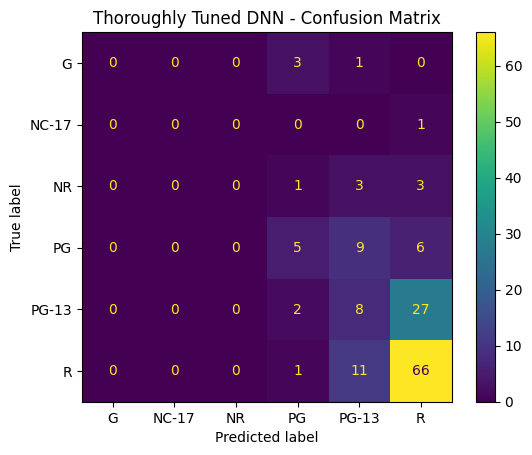

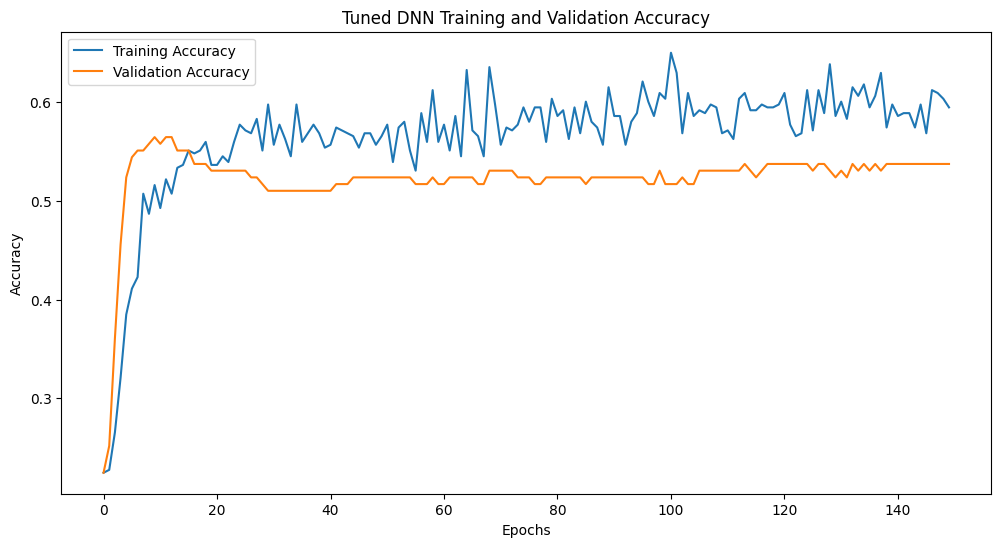




Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree  \
Accuracy                    0.449                0.544   
Precision                   0.471                0.451   
Recall                      0.449                0.544   

           Baseline Random Forest  Tuned Random Forest  \
Accuracy                    0.605                0.626   
Precision                   0.546                0.563   
Recall                      0.605                0.626   

           Baseline Gradient Boosting  Tuned Gradient Boosting  \
Accuracy                        0.544                    0.633   
Precision                       0.547                    0.621   
Recall                          0.544                    0.633   

           Baseline DNN Model  Tuned DNN Model  
Accuracy                0.537            0.537  
Precision               0.521            0.460  
Recall                  0.537            0.537  


In [33]:
!pip install keras-tuner
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize the Comparison DataFrame if it doesn't already exist
if 'comparison' not in globals():
    comparison = pd.DataFrame(index=["Accuracy", "Precision", "Recall"])

# Define the model builder function for KerasTuner
def build_model(hp):
    model = Sequential()
    # Input Layer
    model.add(Dense(
        units=hp.Int('units_input', min_value=64, max_value=512, step=64),
        activation='relu', input_dim=X_dnn_train_scaled.shape[1]
    ))
    model.add(Dropout(hp.Float('dropout_input', min_value=0.1, max_value=0.5, step=0.05)))

    # Hidden Layers
    for i in range(hp.Int('num_layers', 1, 5)):  # Tune up to 5 hidden layers
        model.add(Dense(
            units=hp.Int(f'units_hidden_{i}', min_value=64, max_value=512, step=64),
            activation=hp.Choice('activation', values=['relu', 'tanh'])
        ))
        model.add(Dropout(hp.Float(f'dropout_hidden_{i}', min_value=0.1, max_value=0.5, step=0.05)))

    # Output Layer
    model.add(Dense(y_dnn_train.shape[1], activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize KerasTuner with more trials and executions
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,  # Reduce training epochs for less promising configurations
    executions_per_trial=2,  # Average results over 2 runs per configuration
    directory='dnn_tuning_thorough',
    project_name='fine_tuned_dnn_thorough'
)

# Perform the hyperparameter search
tuner.search(
    X_dnn_train_scaled, y_dnn_train,
    validation_data=(X_dnn_test_scaled, y_dnn_test),
    epochs=100,
    batch_size=32,  # Fixed batch size or modify dynamically
    verbose=1
)

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print("\nBest Hyperparameters:")
for param, value in best_hyperparameters.values.items():
    print(f"{param}: {value}")

# Build and Train the Best Model
best_model = tuner.hypermodel.build(best_hyperparameters)
history = best_model.fit(
    X_dnn_train_scaled, y_dnn_train,
    validation_data=(X_dnn_test_scaled, y_dnn_test),
    epochs=150,  # Train the best model for more epochs to refine performance
    batch_size=best_hyperparameters.values.get('batch_size', 32),  # Default batch size if not tuned
    verbose=1
)

# Evaluate the Best Model
test_loss, test_accuracy = best_model.evaluate(X_dnn_test_scaled, y_dnn_test, verbose=0)
print(f"\nTuned DNN Test Accuracy: {test_accuracy:.3f}")

# Predictions
y_best_pred = best_model.predict(X_dnn_test_scaled)
y_best_pred_classes = np.argmax(y_best_pred, axis=1)
y_test_classes = np.argmax(y_dnn_test, axis=1)

# Decode predictions back to labels
y_best_pred_labels = label_encoder.inverse_transform(y_best_pred_classes)
y_test_labels = label_encoder.inverse_transform(y_test_classes)

# Compute Metrics
precision = precision_score(y_test_classes, y_best_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_best_pred_classes, average='weighted')

print("\nClassification Report:")
print(classification_report(y_test_labels, y_best_pred_labels))

# Add Fine-Tuned DNN results to Comparison DataFrame
comparison = comparison.drop(columns=["Thoroughly Tuned DNN Model"], errors="ignore")
comparison["Tuned DNN Model"] = [test_accuracy, precision, recall]

# Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test_labels, y_best_pred_labels,
    display_labels=label_encoder.classes_
)
plt.title("Thoroughly Tuned DNN - Confusion Matrix")
plt.show()

print("\n")

# Training History Plot
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Tuned DNN Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("\n")

# Print Comparison Table
print("\nComparison Table:")
print(comparison.round(3))


## CatBoost

### Baseline Model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.0 MB/s eta 0:00:00

Baseline CatBoost Results (Test Set):
Accuracy: 0.565, Precision: 0.539, Recall: 0.565



<Figure size 800x600 with 0 Axes>

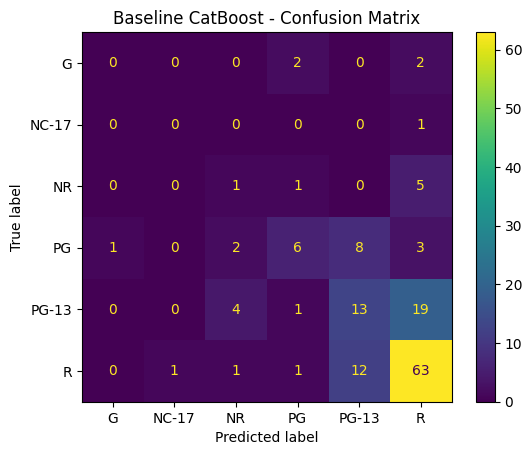

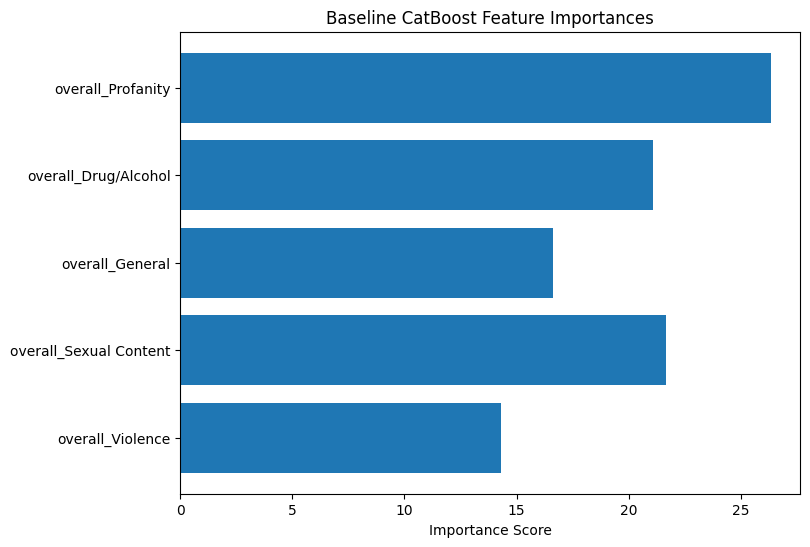




Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree  \
Accuracy                    0.449                0.544   
Precision                   0.471                0.451   
Recall                      0.449                0.544   

           Baseline Random Forest  Tuned Random Forest  \
Accuracy                    0.605                0.626   
Precision                   0.546                0.563   
Recall                      0.605                0.626   

           Baseline Gradient Boosting  Tuned Gradient Boosting  \
Accuracy                        0.544                    0.633   
Precision                       0.547                    0.621   
Recall                          0.544                    0.633   

           Baseline DNN Model  Tuned DNN Model  Baseline CatBoost  
Accuracy                0.537            0.537              0.565  
Precision               0.521            0.460              0.539  
Recall                  0.537            0.5

In [34]:
# Install CatBoost
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize the Comparison DataFrame if it doesn't already exist
if 'comparison' not in globals():
    comparison = pd.DataFrame(index=["Accuracy", "Precision", "Recall"])

# Baseline CatBoost Model without Class Weights
baseline_cb_model = CatBoostClassifier(random_seed=42, verbose=0)  # No class_weights for this run
baseline_cb_model.fit(X_train, y_train)

# Predictions on the test set
y_cb_pred = baseline_cb_model.predict(X_test)

# Evaluate Baseline CatBoost Model
cb_acc = accuracy_score(y_test, y_cb_pred)
cb_precision = precision_score(y_test, y_cb_pred, average='weighted')
cb_recall = recall_score(y_test, y_cb_pred, average='weighted')

print("\nBaseline CatBoost Results (Test Set):")
print(f"Accuracy: {cb_acc:.3f}, Precision: {cb_precision:.3f}, Recall: {cb_recall:.3f}\n")

# Add Baseline CatBoost results to Comparison DataFrame
comparison["Baseline CatBoost"] = [cb_acc, cb_precision, cb_recall]

# Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_cb_pred,
    display_labels=np.unique(y_test)  # Display unique categories from the test set
)
plt.title("Baseline CatBoost - Confusion Matrix")
plt.show()

print("\n")

# 2. Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, baseline_cb_model.feature_importances_)
plt.title("Baseline CatBoost Feature Importances")
plt.xlabel("Importance Score")
plt.show()

print("\n")

# Display Comparison Table
print("\nComparison Table:")
print(comparison.round(3))


### Tuned Model

Class Weights: [7.145833333333333, 28.583333333333332, 3.175925925925926, 1.1909722222222223, 0.6647286821705426, 0.31583793738489874]
Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(



Best Hyperparameters: {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.2}

Tuned CatBoost Results (Test Set):
Accuracy: 0.537, Precision: 0.532, Recall: 0.537



<Figure size 800x600 with 0 Axes>

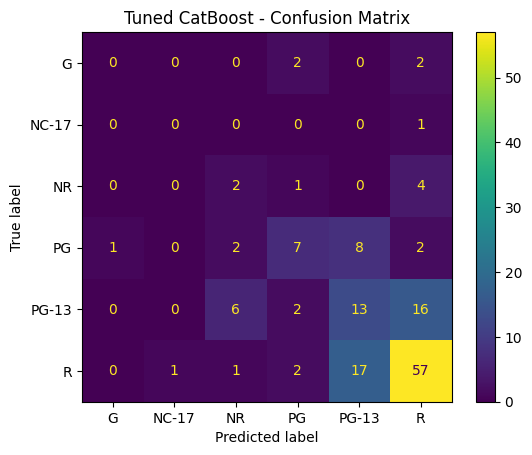

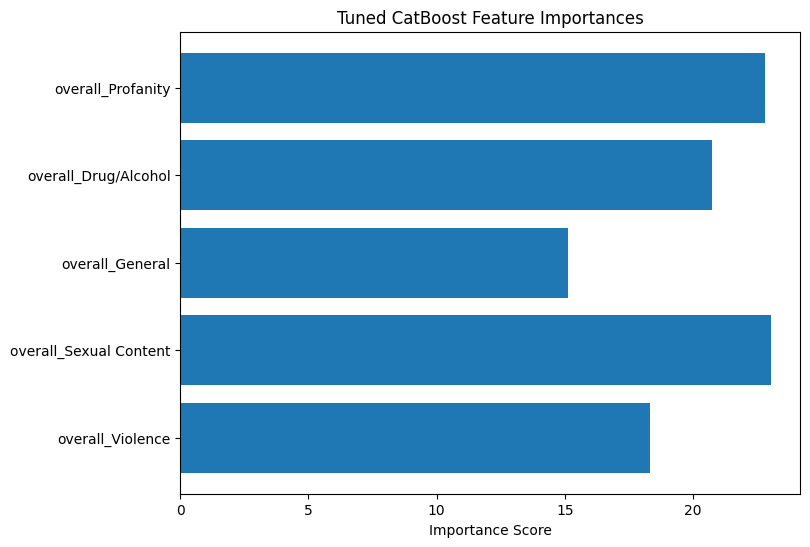




Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree  \
Accuracy                    0.449                0.544   
Precision                   0.471                0.451   
Recall                      0.449                0.544   

           Baseline Random Forest  Tuned Random Forest  \
Accuracy                    0.605                0.626   
Precision                   0.546                0.563   
Recall                      0.605                0.626   

           Baseline Gradient Boosting  Tuned Gradient Boosting  \
Accuracy                        0.544                    0.633   
Precision                       0.547                    0.621   
Recall                          0.544                    0.633   

           Baseline DNN Model  Tuned DNN Model  Baseline CatBoost  \
Accuracy                0.537            0.537              0.565   
Precision               0.521            0.460              0.539   
Recall                  0.537            

In [35]:
# Install CatBoost
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize the Comparison DataFrame if it doesn't already exist
if 'comparison' not in globals():
    comparison = pd.DataFrame(index=["Accuracy", "Precision", "Recall"])

# Compute class weights (balanced) based on the target class distribution
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = class_weights.tolist()  # Convert to list for CatBoost
print(f"Class Weights: {class_weights}")

# Define the parameter grid for tuning
param_grid = {
    'iterations': [200, 500, 1000],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'depth': [4, 6, 8],  # Depth of the tree
    'l2_leaf_reg': [1, 3, 5]  # L2 regularization coefficient
}

# Initialize CatBoostClassifier with fixed random seed and class weights
cb_model = CatBoostClassifier(
    random_seed=42,
    verbose=0,  # Turn off verbose output
    class_weights=class_weights
)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=cb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-Fold Cross-validation
    verbose=1
)

# Perform Grid Search on the Training Set
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and the best model
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

# Use the best model from GridSearchCV
best_cb_model = grid_search.best_estimator_

# Predictions on the test set
y_cb_pred = best_cb_model.predict(X_test)

# Evaluate the Tuned CatBoost Model
cb_acc = accuracy_score(y_test, y_cb_pred)
cb_precision = precision_score(y_test, y_cb_pred, average='weighted')
cb_recall = recall_score(y_test, y_cb_pred, average='weighted')

print("\nTuned CatBoost Results (Test Set):")
print(f"Accuracy: {cb_acc:.3f}, Precision: {cb_precision:.3f}, Recall: {cb_recall:.3f}\n")

# Add Tuned CatBoost results to Comparison DataFrame
comparison["Tuned CatBoost"] = [cb_acc, cb_precision, cb_recall]

# Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_cb_pred,
    display_labels=np.unique(y_test)  # Use unique categories for display
)
plt.title("Tuned CatBoost - Confusion Matrix")
plt.show()

print("\n")

# 2. Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, best_cb_model.feature_importances_)
plt.title("Tuned CatBoost Feature Importances")
plt.xlabel("Importance Score")
plt.show()

print("\n")

# Display updated comparison table
print("\nComparison Table:")
print(comparison.round(3))


## XGBoost

### Baseline Model

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:52:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Baseline XGBoost Results (Test Set):
Accuracy: 0.619, Precision: 0.594, Recall: 0.619



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x600 with 0 Axes>

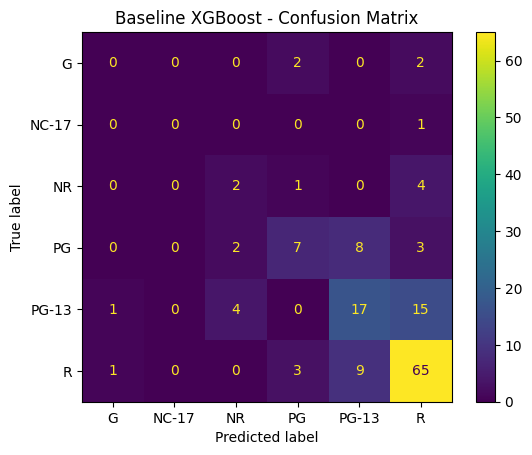

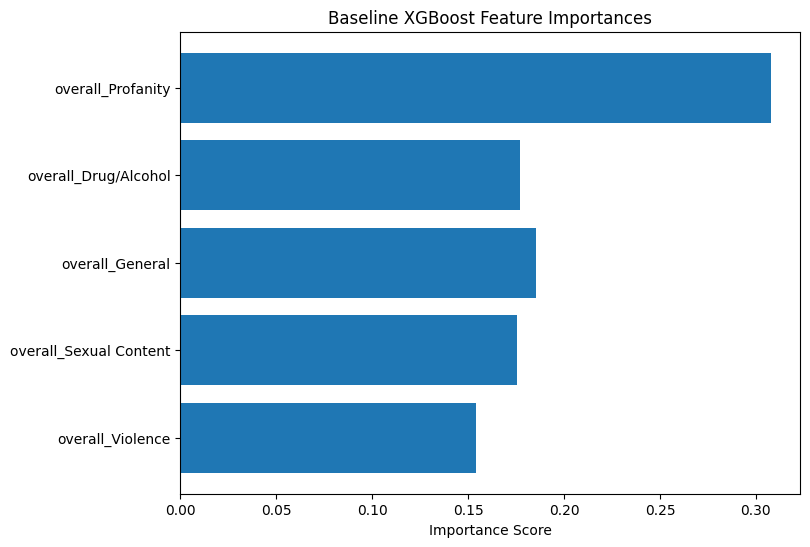




Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree  \
Accuracy                    0.449                0.544   
Precision                   0.471                0.451   
Recall                      0.449                0.544   

           Baseline Random Forest  Tuned Random Forest  \
Accuracy                    0.605                0.626   
Precision                   0.546                0.563   
Recall                      0.605                0.626   

           Baseline Gradient Boosting  Tuned Gradient Boosting  \
Accuracy                        0.544                    0.633   
Precision                       0.547                    0.621   
Recall                          0.544                    0.633   

           Baseline DNN Model  Tuned DNN Model  Baseline CatBoost  \
Accuracy                0.537            0.537              0.565   
Precision               0.521            0.460              0.539   
Recall                  0.537            

In [37]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the Comparison DataFrame if it doesn't already exist
if 'comparison' not in globals():
    comparison = pd.DataFrame(index=["Accuracy", "Precision", "Recall"])

# Encode target labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode y_train
y_test_encoded = label_encoder.transform(y_test)  # Encode y_test using the same encoder

# Baseline XGBoost Model
baseline_xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,  # Suppress deprecation warning
    eval_metric='mlogloss'    # Multi-class log loss as evaluation metric
)
baseline_xgb_model.fit(X_train, y_train_encoded)  # Train the model using encoded labels

# Predictions on the test set
y_xgb_pred = baseline_xgb_model.predict(X_test)

# Decode predictions and actual test labels back to original string labels
y_xgb_pred_labels = label_encoder.inverse_transform(y_xgb_pred)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Evaluate Baseline XGBoost Model
xgb_acc = accuracy_score(y_test_labels, y_xgb_pred_labels)
xgb_precision = precision_score(y_test_labels, y_xgb_pred_labels, average='weighted')
xgb_recall = recall_score(y_test_labels, y_xgb_pred_labels, average='weighted')

print("\nBaseline XGBoost Results (Test Set):")
print(f"Accuracy: {xgb_acc:.3f}, Precision: {xgb_precision:.3f}, Recall: {xgb_recall:.3f}\n")

# Add Baseline XGBoost results to Comparison DataFrame
comparison["Baseline XGBoost"] = [xgb_acc, xgb_precision, xgb_recall]

# Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test_labels, y_xgb_pred_labels,
    display_labels=label_encoder.classes_  # Display original string labels
)
plt.title("Baseline XGBoost - Confusion Matrix")
plt.show()

print("\n")

# 2. Feature Importance Plot
plt.figure(figsize=(8, 6))
plt.barh(X.columns, baseline_xgb_model.feature_importances_)
plt.title("Baseline XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.show()

print("\n")

# Display updated comparison table
print("\nComparison Table:")
print(comparison.round(3))


### Tuned Model

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(



Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Tuned XGBoost Results (Test Set):
Accuracy: 0.612, Precision: 0.567, Recall: 0.612



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x600 with 0 Axes>

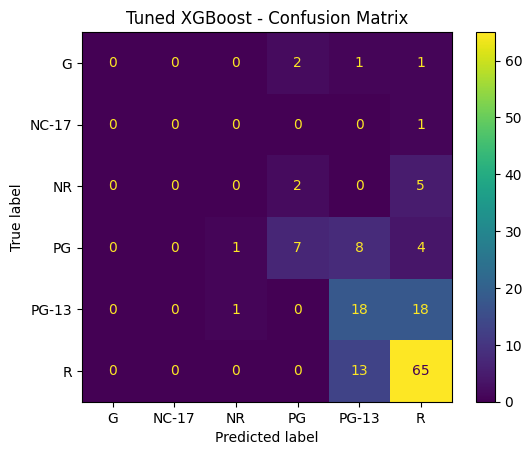

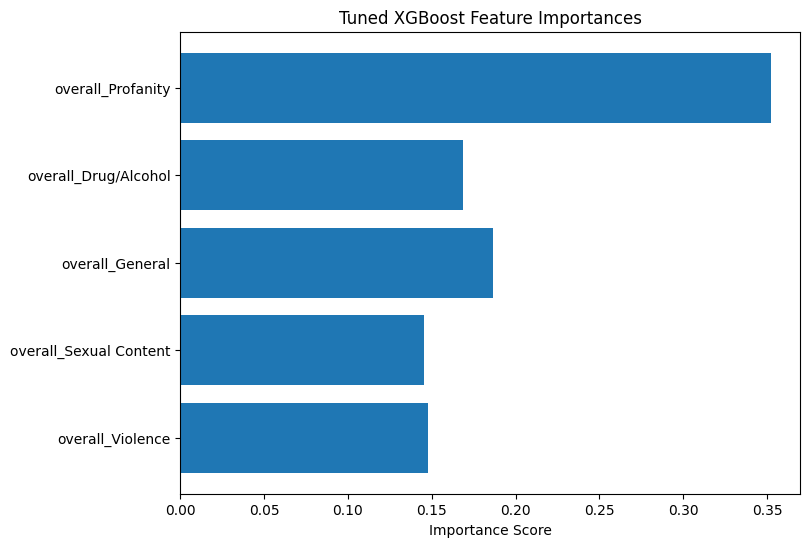


Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree  \
Accuracy                    0.449                0.544   
Precision                   0.471                0.451   
Recall                      0.449                0.544   

           Baseline Random Forest  Tuned Random Forest  \
Accuracy                    0.605                0.626   
Precision                   0.546                0.563   
Recall                      0.605                0.626   

           Baseline Gradient Boosting  Tuned Gradient Boosting  \
Accuracy                        0.544                    0.633   
Precision                       0.547                    0.621   
Recall                          0.544                    0.633   

           Baseline DNN Model  Tuned DNN Model  Baseline CatBoost  \
Accuracy                0.537            0.537              0.565   
Precision               0.521            0.460              0.539   
Recall                  0.537            0.

In [38]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the Comparison DataFrame if it doesn't already exist
if 'comparison' not in globals():
    comparison = pd.DataFrame(index=["Accuracy", "Precision", "Recall"])

# Encode target labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode y_train
y_test_encoded = label_encoder.transform(y_test)  # Encode y_test using the same encoder

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 6, 10],          # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 1.0],          # Fraction of samples for each tree
    'colsample_bytree': [0.8, 1.0]    # Fraction of features for each tree
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss'  # Multi-class log loss
)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1
)

# Perform the grid search
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters and best model
best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

# Best XGBoost Model
best_xgb_model = grid_search.best_estimator_

# Predictions on the test set
y_xgb_pred = best_xgb_model.predict(X_test)

# Decode predictions and actual test labels back to original string labels
y_xgb_pred_labels = label_encoder.inverse_transform(y_xgb_pred)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Evaluate the Tuned XGBoost Model
xgb_acc = accuracy_score(y_test_labels, y_xgb_pred_labels)
xgb_precision = precision_score(y_test_labels, y_xgb_pred_labels, average='weighted')
xgb_recall = recall_score(y_test_labels, y_xgb_pred_labels, average='weighted')

print("\nTuned XGBoost Results (Test Set):")
print(f"Accuracy: {xgb_acc:.3f}, Precision: {xgb_precision:.3f}, Recall: {xgb_recall:.3f}\n")

# Add Tuned XGBoost results to Comparison DataFrame
comparison["Tuned XGBoost"] = [xgb_acc, xgb_precision, xgb_recall]

# Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test_labels, y_xgb_pred_labels,
    display_labels=label_encoder.classes_  # Display original string labels
)
plt.title("Tuned XGBoost - Confusion Matrix")
plt.show()

print("\n")

# 2. Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, best_xgb_model.feature_importances_)
plt.title("Tuned XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.show()

# Display comparison table
print("\nComparison Table:")
print(comparison.round(3))


## Stacking

### Baseline Model

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Baseline Stacking Classifier Results (Test Set):
Accuracy: 0.605, Precision: 0.543, Recall: 0.605



<Figure size 800x600 with 0 Axes>

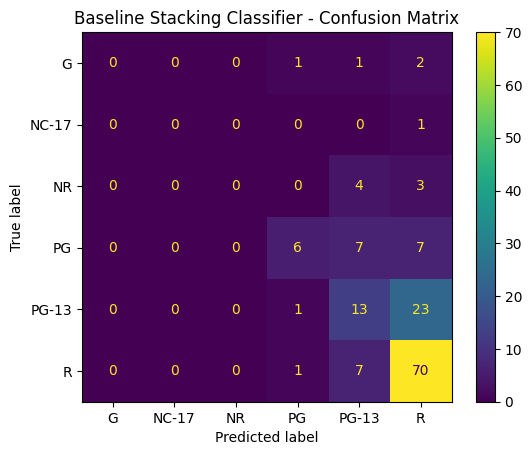




Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree  \
Accuracy                    0.449                0.544   
Precision                   0.471                0.451   
Recall                      0.449                0.544   

           Baseline Random Forest  Tuned Random Forest  \
Accuracy                    0.605                0.626   
Precision                   0.546                0.563   
Recall                      0.605                0.626   

           Baseline Gradient Boosting  Tuned Gradient Boosting  \
Accuracy                        0.544                    0.633   
Precision                       0.547                    0.621   
Recall                          0.544                    0.633   

           Baseline DNN Model  Tuned DNN Model  Baseline CatBoost  \
Accuracy                0.537            0.537              0.565   
Precision               0.521            0.460              0.539   
Recall                  0.537            

In [39]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the Comparison DataFrame if it doesn't already exist
if 'comparison' not in globals():
    comparison = pd.DataFrame(index=["Accuracy", "Precision", "Recall"])

# Encode target labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode y_train
y_test_encoded = label_encoder.transform(y_test)  # Encode y_test using the same encoder

# Base Models
base_estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),  # Decision Tree
    ('rf', RandomForestClassifier(random_state=42))   # Random Forest
]

# Meta-Model
stacking_meta_model = LogisticRegression(random_state=42)

# Stacking Classifier (Baseline)
baseline_stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=stacking_meta_model,
    cv=3  # Cross-validation folds
)

# Train the Stacking Classifier
baseline_stacking_model.fit(X_train, y_train_encoded)

# Predictions on the test set
y_stack_pred = baseline_stacking_model.predict(X_test)

# Decode predictions and actual test labels back to original string labels
y_stack_pred_labels = label_encoder.inverse_transform(y_stack_pred)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Evaluate the Baseline Stacking Classifier
stack_acc = accuracy_score(y_test_labels, y_stack_pred_labels)
stack_precision = precision_score(y_test_labels, y_stack_pred_labels, average='weighted')
stack_recall = recall_score(y_test_labels, y_stack_pred_labels, average='weighted')

print("\nBaseline Stacking Classifier Results (Test Set):")
print(f"Accuracy: {stack_acc:.3f}, Precision: {stack_precision:.3f}, Recall: {stack_recall:.3f}\n")

# Add results to Comparison DataFrame
comparison["Baseline Stacking"] = [stack_acc, stack_precision, stack_recall]

# Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test_labels, y_stack_pred_labels,
    display_labels=label_encoder.classes_  # Display original string labels
)
plt.title("Baseline Stacking Classifier - Confusion Matrix")
plt.show()

print("\n")

# Display Comparison Table
print("\nComparison Table:")
print(comparison.round(3))


### Tuned Model

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(



Best Parameters: {'final_estimator__C': 3.018783098167696, 'gb__learning_rate': 0.09545214831324028, 'gb__max_depth': 3, 'gb__n_estimators': 236, 'rf__max_depth': 3, 'rf__min_samples_split': 3, 'rf__n_estimators': 179}

Tuned Stacking Classifier Results (Test Set):
Accuracy: 0.565, Precision: 0.491, Recall: 0.565



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x600 with 0 Axes>

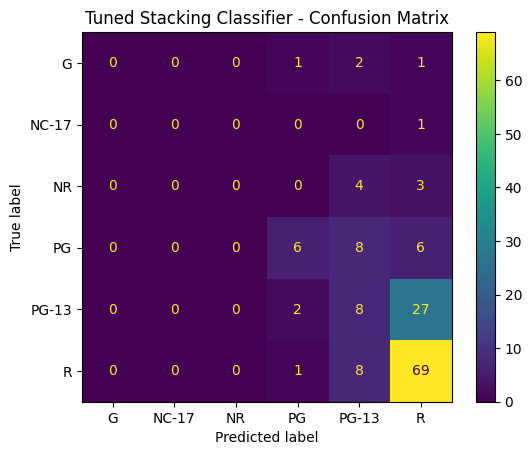


Comparison Table:
           Baseline Decision Tree  Tuned Decision Tree  \
Accuracy                    0.449                0.544   
Precision                   0.471                0.451   
Recall                      0.449                0.544   

           Baseline Random Forest  Tuned Random Forest  \
Accuracy                    0.605                0.626   
Precision                   0.546                0.563   
Recall                      0.605                0.626   

           Baseline Gradient Boosting  Tuned Gradient Boosting  \
Accuracy                        0.544                    0.633   
Precision                       0.547                    0.621   
Recall                          0.544                    0.633   

           Baseline DNN Model  Tuned DNN Model  Baseline CatBoost  \
Accuracy                0.537            0.537              0.565   
Precision               0.521            0.460              0.539   
Recall                  0.537            0.

In [45]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import pandas as pd

# Encode target labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode y_train
y_test_encoded = label_encoder.transform(y_test)  # Encode y_test using the same encoder

# Define base models with broader parameter ranges
base_estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42, max_iter=2000)

# Initialize Stacking Classifier
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_model, cv=4)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'rf__n_estimators': randint(50, 500),              # Random Forest: Number of trees
    'rf__max_depth': randint(3, 15),                  # Random Forest: Depth of the trees
    'rf__min_samples_split': randint(2, 20),          # Random Forest: Minimum samples for split
    'gb__n_estimators': randint(50, 500),             # Gradient Boosting: Number of trees
    'gb__learning_rate': uniform(0.01, 0.3),          # Gradient Boosting: Learning rate
    'gb__max_depth': randint(3, 10),                  # Gradient Boosting: Tree depth
    'final_estimator__C': uniform(0.01, 10)           # Logistic Regression: Regularization strength
}

# Stratified ShuffleSplit to handle class imbalance
cv_strategy = StratifiedShuffleSplit(n_splits=4, test_size=0.3, random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=stacking_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',
    cv=cv_strategy,  # Stratified cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform the randomized search
random_search.fit(X_train, y_train_encoded)

# Get the best parameters and best model
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

best_stacking_model = random_search.best_estimator_

# Predictions on the test set
y_stack_pred = best_stacking_model.predict(X_test)

# Decode predictions and actual test labels back to original string labels
y_stack_pred_labels = label_encoder.inverse_transform(y_stack_pred)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Evaluate the Tuned Stacking Classifier
stack_acc = accuracy_score(y_test_labels, y_stack_pred_labels)
stack_precision = precision_score(y_test_labels, y_stack_pred_labels, average='weighted')
stack_recall = recall_score(y_test_labels, y_stack_pred_labels, average='weighted')

print("\nTuned Stacking Classifier Results (Test Set):")
print(f"Accuracy: {stack_acc:.3f}, Precision: {stack_precision:.3f}, Recall: {stack_recall:.3f}\n")

# Add Tuned Stacking results to Comparison DataFrame
comparison["Tuned Stacking"] = [stack_acc, stack_precision, stack_recall]

# Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test_labels, y_stack_pred_labels,
    display_labels=label_encoder.classes_  # Display original string labels
)
plt.title("Tuned Stacking Classifier - Confusion Matrix")
plt.show()

# Display comparison table
print("\nComparison Table:")
print(comparison.round(3))


## Comparison

In [46]:
print("for\n   'G', 'PG', 'PG-13', 'R', 'NC-17','NR'")

comparison.round(3)

for
   'G', 'PG', 'PG-13', 'R', 'NC-17','NR'


,Baseline Decision Tree,Tuned Decision Tree,Baseline Random Forest,Tuned Random Forest,Baseline Gradient Boosting,Tuned Gradient Boosting,Baseline DNN Model,Tuned DNN Model,Baseline CatBoost,Tuned CatBoost,Baseline XGBoost,Tuned XGBoost,Baseline Stacking,Tuned Stacking
Accuracy,0.449,0.544,0.605,0.626,0.544,0.633,0.537,0.537,0.565,0.537,0.619,0.612,0.605,0.565
Precision,0.471,0.451,0.546,0.563,0.547,0.621,0.521,0.460,0.539,0.532,0.594,0.567,0.543,0.491
Recall,0.449,0.544,0.605,0.626,0.544,0.633,0.537,0.537,0.565,0.537,0.619,0.612,0.605,0.565
